# Interpolación

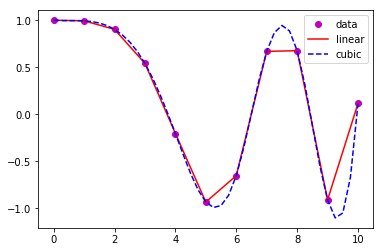

In [10]:
import numpy as np
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
"""
(inicio , parada , num = 50 , punto final = verdadero , retstep = falso , dtype = ninguno ) 
Devuelve números espaciados uniformemente durante un intervalo especificado. 
Devuelve num muestras espaciadas uniformemente, calculadas a lo largo del intervalo [ inicio , parada ]. 
El punto final del intervalo puede excluirse opcionalmente. 
"""
y = np.cos(-x**2/9.0)
f = interp1d(x, y) 
# Esta clase devuelve una función cuyo método 
#de llamada utiliza la interpolación para encontrar el valor de nuevos puntos. 
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'mo', xnew, f(xnew), 'r-', xnew, f2(xnew), 'b--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

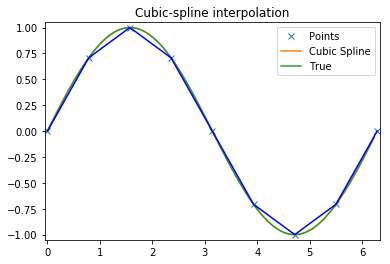

In [12]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)   #crea la función, con s una condicion de peso. (suavidad)
xnew = np.arange(0, 2*np.pi, np.pi/50)  # se crean los nuevos puntos
ynew = interpolate.splev(xnew, tck, der=0) # se obtiene la imagen de los puntos B-spline 
#y sus derivadas que funcionan para mayor precisión, con el orden der=0
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Points', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

In [13]:
 def func(x, y):
...     return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [14]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [15]:
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

In [16]:
from scipy.interpolate import griddata
#devuelve el valor en el punto de datos más cercano al punto de interpolación
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
#interpolar linealmente.
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
#devuelve el valor determinado de una spline cúbica.(parciales)
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

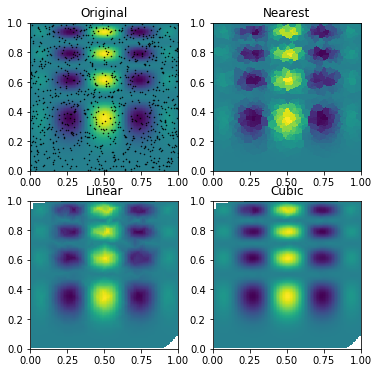

In [17]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()